# Part 1: `Torchvision` Datasets

Before getting started with the implementation of this code, you need to be familiar with the PyTorch computer vision library: `Torchvision`

| PyTorch module | What does it do? |
| ----- | ----- |
| [torchvision](https://pytorch.org/vision/stable/index.html) | Contains datasets, model architectures and image transformations often used for computer vision problems. |
| [torchvision.datasets](https://pytorch.org/vision/stable/datasets.html) | Here you'll find many example computer vision datasets for a range of problems from image classification, object detection, image captioning, video classification and more. It also contains [a series of base classes for making custom datasets](https://pytorch.org/vision/stable/datasets.html#base-classes-for-custom-datasets). |
| [torchvision.models](https://pytorch.org/vision/stable/models.html) | This module contains well-performing and commonly used computer vision model architectures implemented in PyTorch, you can use these with your own problems. | 
| [torchvision.transforms](https://pytorch.org/vision/stable/transforms.html) | Often images need to be transformed (turned into numbers/processed/augmented) before being used with a model, common image transformations are found here. | 
| [torch.utils.data.Dataset](https://pytorch.org/docs/stable/data.html#torch.utils.data.Dataset) | Base dataset class for PyTorch.  | 
| [torch.utils.data.DataLoader](https://pytorch.org/docs/stable/data.html#module-torch.utils.data) | Creates a Python iterable over a dataset (created with torch.utils.data.Dataset). |

> **Note:** The `torch.utlis.data.Dataset` and `torch.utils.data.DataLoader` classes aren't only for computer vision in PyTorch, they are capable of dealing with many different types of data.

## 1.1 Setup Environment

In [29]:
# Import PyTorch
import torch
from torch.utils.data import Subset, Dataset

# Import torchvision
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

# Import matplotlib for visualization
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Import other libraries
import random
from PIL import Image
import numpy as np

# Check versions
# Note: your PyTorch version shouldn't be lower than 1.10.0 and torchvision version shouldn't be lower than 0.11
print(f"PyTorch version: {torch.__version__}\ntorchvision version: {torchvision.__version__}")

PyTorch version: 2.3.0+cpu
torchvision version: 0.18.0+cpu


## 1.2 Load Datasets

We are doing to load the *train* and *test* splits of **3 datasets** from `torchvision.datasets`, namely:
* `MNIST`: A collection of handwritten digits ranging from the number *0* to *9*
* `FashionMNIST`: A dataset comprising of *28 x 28* grayscale images of fashion products from different categories 
* `CIFAR-10`: A dataset containing *32 x 32* color images from *10* different classes representing airplanes, cars, birds, cats, deer, dogs, frogs, horses, ships, and trucks

In [4]:
# TODO -- Use torchvision.datasets to load the training splits of each of the datasets mentioned above
# TODO -- Use the datasets.MNIST, datasets.FashionMNIST, and datasets.CIFAR10 classes 
# TODO -- set transform=ToTensor()

## Your code here
# Setup training data
mnist_train = None
fmnist_train = None
cifar10_train = None
# ------------------------------

# TODO -- Compute the size and extract classes from each of the datasets

# Store length of each dataset in a variable
mnist_train_len = None
fmnist_train_len = None
cifar10_train_len = None

# Store classes for each dataset in a variable
mnist_classes = None
fmnist_classes = None
cifar10_classes = None

In [6]:
# DONOT MODIFY CODE BELOW THIS LINE
print(f"MNIST Dataset:\nTrain size: {mnist_train_len} samples\nClasses: {mnist_classes}")
print('-' * 50)
print(f"FashionMNIST Dataset:\nTrain size: {fmnist_train_len} samples\nClasses: {fmnist_classes}")
print('-' * 50)
print(f"CIFAR-10 Dataset:\nTrain size: {cifar10_train_len} samples\nClasses: {cifar10_classes}")

MNIST Dataset:
Train size: None samples
Classes: None
--------------------------------------------------
FashionMNIST Dataset:
Train size: None samples
Classes: None
--------------------------------------------------
CIFAR-10 Dataset:
Train size: None samples
Classes: None


## 1.3 Data Visualization

An important aspect of understanding any dataset is visualising different examples present in it. Accordingly, in this section we are going to visualize a **batch** of samples from each of the datasets extracted in the above section.

**Hint:** *It may be helpful to check for the number of channels before displaying images. Tensor images are usually stored in the format `[c, h, w]` (channels first) while `matplotlib.pyplot.imshow()` accepts images in `[h, w, c]` (channels last) format*.

In [4]:
def visualize(dataset: torch.utils.data.Dataset, dataset_name: str, class_names: list, items: int=16):
    """
    Visualize a random sample of images from the given dataset.

    Args:
        dataset (torch.utils.data.Dataset): the dataset containing the images.
        dataset_name (str): the name of the dataset.
        class_names (list): The list of class names corresponding to the labels
        items (int): The number of items to visualize. Default
    Returns:
        None
    """
    torch.manual_seed(0)
    fig = plt.figure(figsize=(15, 4))
    rows = 2
    cols = items // rows

    for i in range(1, items + 1):
        
        # TODO -- Select a random integer using torch.randint() (or any equivalent method)
        # TODO -- Use the random integer to select a random image and its corresponding label from the dataset

        ## Your code here
        img, label = None, None
        # ------------------------------

        fig.add_subplot(rows, cols, i)
        # TODO: Check the number of channels in the image. 
        # TODO: If no. of channels are 1, use plt.imshow(image.squeeze(), cmap='gray'), else use plt.imshow(image.permute(1, 2, 0))

        plt.title(f"Class:{class_names[label]}\nShape:{list(img.shape)}", fontsize=8)
        plt.axis('off')
    
    plt.suptitle(dataset_name, fontweight="bold")
    plt.tight_layout()
    plt.show()

In [ ]:
# DONOT MODIFY CODE BELOW THIS LINE
# Iterate over each dataset and its corresponding classes
dataset_list = [(mnist_train, mnist_classes), (fmnist_train, fmnist_classes), (cifar10_train, cifar10_classes)]
dataset_names = ["MNIST", "FashionMNIST", "CIFAR-10"]
for name, (dataset, classes) in zip(dataset_names, dataset_list):
    # Call the visualize function to visualize a random sample of images from the dataset
    visualize(dataset, name, classes)

## 1.4 Compare and Contrast

**Analyze the differences in image characteristics (e.g., color channels, image size) among the three datasets.**

<span style="color:green;"> *Your response here* </span>

**Discuss how these differences might affect preprocessing steps for Deep Learning tasks?**

<span style="color:green;"> *Your response here* </span> 

## 1.5 Data Transformation and Augmentation

Data transformation is a crucial step in preparing data for deep learning models. It involves various techniques to preprocess and augment the data, ensuring that the model can learn effectively. Here are some common data transformation techniques:

| Technique              | Description                                                                                                                                                       |
|------------------------|-------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| **Normalization**      | This process scales the pixel values of images to a standard range, typically [0, 1] or [-1, 1]. Normalization helps in faster convergence during training and can improve model performance. |
| **Rescaling**          | Rescaling adjusts the size of the images to a fixed dimension, which is necessary for feeding images into a neural network.                                        |
| **Centering**          | This involves subtracting the mean of the dataset from each image, which helps in reducing the bias in the data.                                                   |
| **Standardization**    | This technique scales the data to have a mean of zero and a standard deviation of one. It is particularly useful when the features have different units or scales.  |
| **Data Augmentation**  | This includes techniques like random cropping, flipping, rotation, and color jittering to artificially increase the size of the training dataset and improve the model's generalization. |
| **Grayscale Conversion** | Converting RGB images to grayscale can be useful for certain tasks where color information is not important.                                                      |
| **Tensor Conversion**  | Converting images to tensors is necessary for processing them with deep learning frameworks like PyTorch.                                                          |

By applying these transformations, you can ensure that your data is in the best possible shape for training a deep learning model, leading to better performance and more robust models.

**Note:** For this section we are going to perform a subset of these transformations on `CIFAR-10` dataset due to its *interesting* `RGB` format.

In [3]:
import matplotlib.patches as patches
def compare_images(dataset: torch.utils.data.Subset, transform: torchvision.transforms, class_names: list, n: int=4):
    """
    Applies the given transformation to a random image from the dataset and compares the original and transformed images.

    Args:
        dataset (torch.utils.data.dataset.Subset): the original dataset containing the images.
        transform (torchvision.transforms): the transformation to apply to the images.
        class_names (list): The list of class names corresponding to the labels
        n (int): The number of pairs of images to compare. Default is 4.
    Returns:
        None
    """
    torch.manual_seed(0)
    for i in range(n):
        random_idx = torch.randint(0, len(dataset), (1,)).item()
        img, label = dataset[random_idx]
        img_transformed = transform(img)
        fig, ax = plt.subplots(1, 2)
        ax[0].imshow(img.squeeze(), cmap='gray') if img.shape[0] == 1 else ax[0].imshow(img.permute(1, 2, 0))
        ax[0].set_title(f'Original \n Size: {img.shape}')
        ax[0].axis('off')
        rect = patches.Rectangle((0, 0), 1, 1, transform=ax[0].transAxes, linewidth=2, edgecolor='k', facecolor='none')
        ax[0].add_patch(rect)

        ax[1].imshow(img_transformed.squeeze(), cmap='gray') if img_transformed.shape[0] == 1 else ax[1].imshow(img_transformed.permute(1, 2, 0))
        ax[1].set_title(f'Transformed \n Size: {img_transformed.shape}')
        ax[1].axis('off')
        rect = patches.Rectangle((0, 0), 1, 1, transform=ax[1].transAxes, linewidth=2, edgecolor='k', facecolor='none')
        ax[1].add_patch(rect)
        fig.suptitle(f"Class: {class_names[label]}", fontsize=14, fontweight='bold')

    plt.show()

### 1.5.1 Rescaling
We will begin by defining a simple transform for **rescaling (resizing)** a given input image from size [3, 32, 32] to **size [3, 16, 16]** using `torchvision.transforms.Resize()` method 

In [ ]:
# TODO - Define a transformation for the images to resize the images to torch.Size([3,16,16])
# TODO - Visualize the transformed images using the compare_images() function
## Your code here 
resize = None
## ----------------------------

# DONOT MODIFY CODE BELOW THIS LINE
compare_images(cifar10_train, resize, cifar10_classes)

### 1.5.2 Grayscaling
Next, we will convert the RGB channels to a **single channel (e.g., grayscaling)** using `torchvision.transforms.Grayscale()` method

In [ ]:
# TODO - Define a transformation for the images to grayscale 
# TODO - Visualize the transformed images using the compare_images() function
## Your code here
grayscale = None
## ----------------------------

# DONOT MODIFY CODE BELOW THIS LINE
compare_images(cifar10_train, grayscale, cifar10_classes)

### 1.5.3 Composition
Finally, we will combine these transformations to be performed **sequentially** in addition to **random horizontal flipping** using `torchvision.transforms.Compose()` method. 

The horizontal flipping is achieved using `torchvision.transforms.RandomHorizontalFlip`

In [ ]:
# TODO -- Define a compose transformation to resize the images to 3x16x16, convert them to grayscale, and finally apply random horizontal flip
# TODO -- Visualize the transformed images using the compare_images() function 
## Your code here
compose = None
## ----------------------------

# DONOT MODIFY CODE BELOW THIS LINE
compare_images(cifar10_train, compose, cifar10_classes)

### 1.5.4 `TrivialAugment` for Data Augmentation
We have seen a couple of transforms on the `CIFAR-10` dataset but there are plenty more. You can find them in [`torchvision.transforms` documentation](https://pytorch.org/vision/stable/transforms.html).

**Data augmentation** is the process of altering your data in such a way that you *artificiallly* increase the diversity of your training set. 

Training a model on this *artificially* altered dataset (hopefully) results in a model that is capable of better *generalization*. 

Machine Learning is all about harnessing the power of randomness and research shows that random transforms like [`transforms.TrivialAugmentWide()`](https://pytorch.org/vision/main/generated/torchvision.transforms.TrivialAugmentWide.html) generally perform better than hand-picked transforms. (*It is encouraged to explore the effectiveness of this method from its [original paper](https://arxiv.org/abs/2103.10158)*)

The idea behind this approach is to **randomly** pick transforms from a set of preexisting ones and apply them on an image at **random** orders of magnitudes

In this section we are going see `TrivialAugmentWide()` in live action!

In [ ]:
# TODO -- Define a transformation using transforms.TrivialAugmentationWide()
# TODO -- Experiment around with different values of the parameter 'num_magnitude_bins' but do not exceed 10 
# TODO -- Visualize the transformed images using the compare_images() function 

## Your code here
trivial_augmentation = None
## ----------------------------

# DONOT MODIFY CODE BELOW THIS LINE
compare_images(cifar10_train, trivial_augmentation, cifar10_classes, n=8)

# Part 2: Custom Dataset
So far, we have been using pre-defined datasets present in `torchvision.datasets` library. 

What if we want to load a custom dataset to train and validate our Machine Learning model? This can be achieved by using the `torch.utils.data` library

In this section we are going to setup our *custom dataset* using a 'trimmed' version of the [**Caltech-101**](https://data.caltech.edu/records/mzrjq-6wc02) dataset.

*Summary*: The **Caltech-101 dataset** is a collection of images used for object recognition research. It contains **pictures of objects** belonging to **101 different categories**, along with a background category. Each category has between **40 to 800 images**, with most categories having around **50 images**. The images are of medium resolution, roughly **300 x 200 pixels**.

To keep things simple, we will be using **5 classes**, and **~50 images** per classes

In [30]:
import random
import numpy as np
import os
import pathlib
import torch
from PIL import Image
from torch.utils.data import Dataset
from torchvision import transforms
from typing import Tuple, Dict, List

import matplotlib.pyplot as plt

## 2.1 Get data

The following code will download the caltech101_5_classes data from GitHub 

In [14]:
# DONOT MODIFY CODE BELOW THIS LINE
import requests
import zipfile
from pathlib import Path

# Setup path to data folder
data_path = Path("data/")
image_path = data_path / "caltech101_5_classes"

# If the image folder doesn't exist, download it and prepare it... 
if image_path.is_dir():
    print(f"{image_path} directory exists.")
else:
    print(f"Did not find {image_path} directory, creating one...")
    image_path.mkdir(parents=True, exist_ok=True)
    
    # Download caltech101_5_classes data
    url = "https://github.com/muqeemmm/Deep-Learning-Assignments/raw/main/caltect_101_sub.zip"
    zip_path = data_path / "caltech101_5_classes.zip"
    
    response = requests.get(url, stream=True)
    if response.status_code == 200:
        print("Downloading caltech101_5_classes data...")
        with open(zip_path, "wb") as f:
            for chunk in response.iter_content(chunk_size=128):
                f.write(chunk)
    else:
        print(f"Failed to download file, status code: {response.status_code}")
        response.raise_for_status()

    # Unzip caltech101_5_classes data
    try:
        with zipfile.ZipFile(zip_path, "r") as zip_ref:
            print("Unzipping caltech101_5_classes.zip...") 
            zip_ref.extractall(image_path)
    except zipfile.BadZipFile:
        print("Error: The downloaded file is not a valid zip file.")

data\caltech101_5_classes directory exists.


You can see the example storage formate below:

```
caltech101_5_classes/ <- overall dataset folder
        accordion/ <- class name as folder name
            image_0001.jpeg
            image_0002.jpeg
            ...
        ant/
            image_0001.jpeg
            image_0002.jpeg
            ...
        chair/
            image_0001.jpeg
            image_0002.jpg
            ...
        elephant/
            image_0001.jpg
            image_0002.jpg
            ...
        sunflower/
            image_0001.jpg
            image_0002.jpg
            ...
```

The goal will be to take this data storage structure and turn it into a **dataset usable with PyTorch**

## 2.2 Data Preparation

Before turning this data storage into a *PyTorch dataset*, lets analyze some key features first:

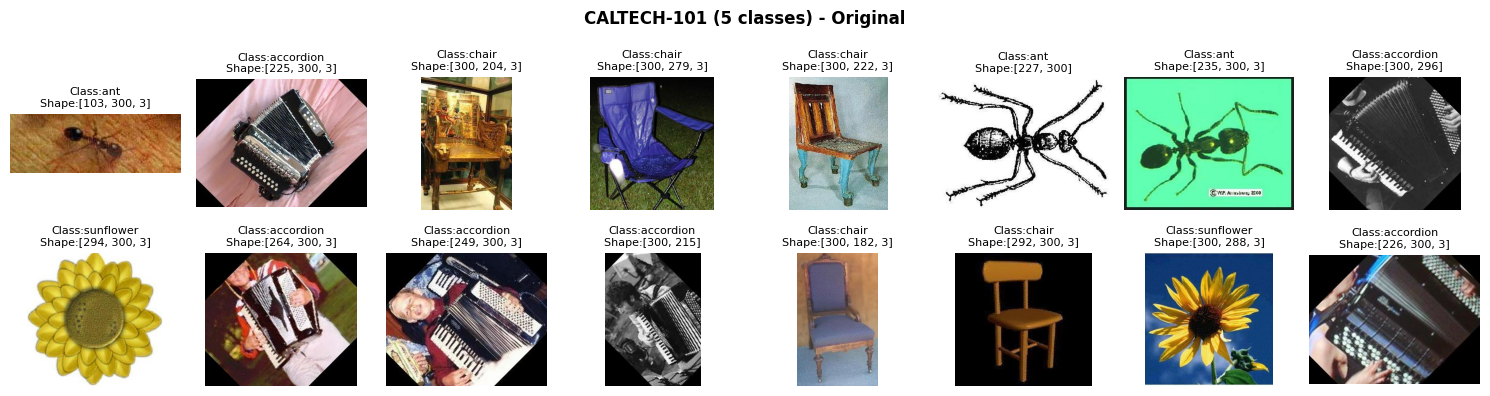

In [25]:
def visualize_caltech_dataset(image_path: Path, transforms: torchvision.transforms=None):
    fig = plt.figure(figsize=(15, 4))
    rows, columns = 2, 8
    random.seed(42)
    for i in range(1, rows * columns + 1):
        fig.add_subplot(rows, columns, i)

        # 1. Get all image paths (* means "any combination")
        image_path_list = list(image_path.glob("*/*.jpg"))

        # 2. Get random image path
        random_image_path = random.choice(image_path_list)

        # 3. Get image class from path name (the image class is the name of the directory where the image is stored)
        image_class = random_image_path.parent.stem

        # 4. Open image
        img = Image.open(random_image_path)
        if transforms:
            img = transforms(img)
            if img.shape[0] == 1:
                img = img.squeeze()
            else:
                img = img.permute(1, 2, 0)

        if np.array(img).ndim > 2:
            plt.imshow(img)
        else:
            plt.imshow(img, cmap="gray")
        plt.title(f"Class:{image_class}\nShape:{list(np.array(img).shape)}", fontsize=8)
        plt.axis("off")

    if transforms:
        plt.suptitle("CALTECH-101 (5 classes) - Transformed", fontweight="bold")
    else:
        plt.suptitle("CALTECH-101 (5 classes) - Original", fontweight="bold")
    plt.tight_layout()
    plt.show()

visualize_caltech_dataset(image_path)

Given the above visualization of a few samples from the dataset, briefly discuss key observations that can be derived. 

*Hint: Focus on the shapes and the number of channels for each image. Are there any augmentations already present?*

<span style="color:green;"> *Your observations here* </span>

## 2.3 Data Transformation
As can be observed above, the dataset is **non-uniform** with a mixture of *RGB* and *Grayscale* images. In this and the upcoming section, we will ensure that we **only** load uniform sized RGB images as tensors from the data storage

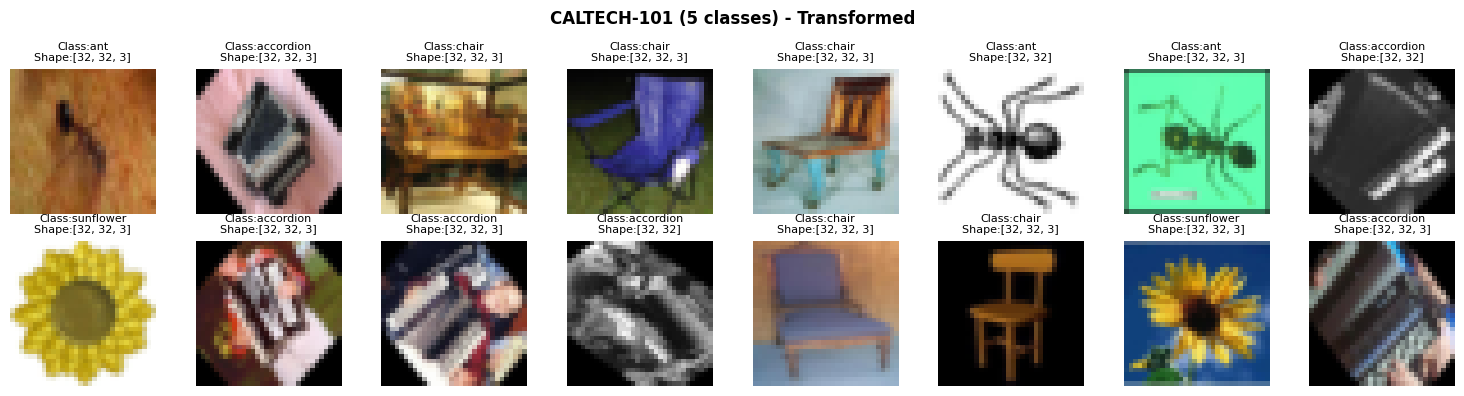

In [27]:
# TODO -- Define a data tranform for images using transforms.Compose()
# TODO -- Resize the images to 32x32
# TODO -- Flip the images randomly on the horizontal axis 
# TODO -- Turn the images into tensors

## Your code here
data_transform = None
## ----------------------------

# DONOT MODIFY CODE BELOW THIS LINE
visualize_caltech_dataset(image_path, transforms=data_transform)

## 2.4 Loading data with Custom `Dataset`
Now that we have a data storage and `data_transform`, we can define a custom dataset inheriting attributes from `torch.utils.Dataset`. 

This class can be used as a **default procedure** of *extracting data* from the data storage

Before we start with defining this procedure, lets define a function to compute the `class_names` and `class_to_idx` dictionary:

In [31]:
# Make a function to find classes in target directory
def find_classes(directory: str) -> Tuple[List[str], Dict[str, int]]:
    """
    Finds the class folders in a dataset directory and returns the class names and class-to-index mapping.

    Args:
        directory (str): The directory containing the class folders.

    Returns:
        Tuple[List[str], Dict[str, int]]: A tuple containing a list of class names and a dictionary mapping class names to indices.
    """
    # TODO -- Use os.scandir() to get the list of directories in the target directory. 
    # TODO -- Sort this list.
    ## Your code here
    classes = None
    # ------------------------------
    if not classes:
        raise FileNotFoundError(f"No class directories found in {directory}")
    
    # TODO -- Create a dictionary mapping class names to indices
    ## Your code here
    class_to_idx = None
    # ------------------------------
    return classes, class_to_idx

# DONOT MODIFY CODE BELOW THIS LINE
find_classes(image_path)

Now, we will define our custom dataset by subclassing `torch.utils.data.Dataset`

In [ ]:
# 1. Define a class Caltech5(Dataset) that inherits from torch.utils.data.Dataset
class Caltech5(Dataset):
    # 2. Define the __init__ method that initializes the dataset with the target directory and the transformation (optional)
    def __init__(self, targ_dir: str, transform: torchvision.transforms=None) -> None:
        # 3. Create class attributes
        # TODO -- Get all image paths using pathlib.Path and glob. Store in a list
        # TODO -- Setup transforms using the transform argument
        # TODO -- Create classes and classes_to_idx attribute. Use the find_classes() function here
        ## Your code here
        self.paths = None
        self.transform = None
        self.classes, self.classes_to_idx = None
        ## ----------------------------
    
    # Function to load images
    def load_image(self, index: int) -> Image.Image:
        image_path = self.paths[index]
        return Image.open(image_path)

    # 4. Define the __len__ method that returns the length of the dataset
    def __len__(self) -> int:
        # TODO -- Return the length of the dataset
        ## Your code here
        return None
        ## ----------------------------

    # 5. Define the __getitem__ method that returns a sample from the dataset at a given index
    def __getitem__(self, index: int) -> Tuple[torch.Tensor, int]:
        # TODO -- Load the image using the load_image() method
        # TODO -- Find the class_name using self.paths and the index
        # TODO -- Find the class index using the class_name and self.classes_to_idx
        # TODO -- Apply the transformation to the image if not None
        ## Your code here
        img = None
        class_name = None
        class_idx = None
        # ------------------------------
        
        return img, class_idx

In [ ]:
# DONOT MODIFY CODE BELOW THIS LINE
caltech_5 = Caltech5(targ_dir=image_path, 
                     transform=data_transform)

## 2.5 Data Visualization

Finally, to test out the full potential of our custom dataset, we will call the `visualize()` function defined in the first part for `torchvision.datasets`. If there are no output errors, then it safe to assume that this dataset can be used to train classifier models

classes, _= find_classes(image_path)
visualize(caltech_5, "CALTECH-5 Dataset", classes)